#2024 Revisting the GNN LSTM work to work for the paper to generate the results
Datset  email-Eu-core temporal network -dept 1  "All e-mails between members of Department 1 at the institution"
link : https://snap.stanford.edu/data/email-Eu-core-temporal.html
SRC: id of the source node (a user)
TGT: id of the target node (a user)
TS: timestamp (in seconds), starting from 0


In [1]:
import sys
import os
os.path.join(os.getcwd())
import matplotlib; print(matplotlib.__version__)
import pandas as pd
import numpy as np
import networkx as nx
from datetime import date, timedelta
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

3.8.0


In [ ]:
dir_path = 'C:\\Priyanka\\dynamic-infmax-gnn-lstm\\'

In [101]:
#reading direct csv for bit coing  soc-sign-bitcoinalpha.csv
#SOURCE, TARGET, RATING, TIME  https://snap.stanford.edu/data/soc-sign-bitcoin-alpha.html

graph_path = dir_path + "\\soc-sign-bitcoinalpha.csv"
df = pd.read_csv(graph_path, header=None)

In [102]:
# rename columns
df.rename(columns={0:"source", 1:"target",2:"rating",3:"timestamp"}, inplace=True)
#df.rename(columns={0:"source", 1:"target",2:"weight", 3:"timestamp"}, inplace=True)
df

,source,target,rating,timestamp
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400
...,...,...,...,...
24181,7604,7601,10,1364270400
24182,7601,7604,10,1364270400
24183,7604,7602,10,1364270400
24184,7602,7604,10,1364270400


In [131]:
## drop duplicate edge connection due to multiple version of timestamps for each citations (kept first Ver)
df = df.drop_duplicates(
  subset = ['source', 'target'],
  keep = 'first').reset_index(drop = True)

In [132]:
 # convert unix time stamp to pandas datetime
df['date'] = pd.to_datetime(df['timestamp'], unit="s")
df['date'] 

0       2014-08-08 04:00:00
1       2013-08-15 04:00:00
2       2013-05-28 04:00:00
3       2012-10-12 04:00:00
4       2012-09-17 04:00:00
                ...        
24181   2013-03-26 04:00:00
24182   2013-03-26 04:00:00
24183   2013-03-26 04:00:00
24184   2013-03-26 04:00:00
24185   2013-03-26 04:00:00
Name: date, Length: 24186, dtype: datetime64[ns]

In [133]:
# gropuping date based on year and month 
#grouped = df.groupby([df['date'].dt.year])
grouped = df.groupby([df['date'].dt.year, df['date'].dt.month])

#only for aves animal social datasets
#grouped = df.groupby(df['timestamp'])

In [134]:
grouped.size()

date  date
2010  11       41
      12       57
2011  1        67
      2       188
      3       175
             ... 
2015  9        25
      10       20
      11        9
      12       38
2016  1        17
Length: 63, dtype: int64

In [135]:
grouped

In [117]:
# Access the last group
last_group = grouped.get_group(max(grouped.groups))
last_group

,source,target,rating,timestamp,date
5252,3447,15,3,1451797200,2016-01-03 05:00:00
5382,15,3451,1,1453438800,2016-01-22 05:00:00
5383,15,2437,1,1452834000,2016-01-15 05:00:00
5384,15,3443,1,1452747600,2016-01-14 05:00:00
5385,15,3448,1,1452747600,2016-01-14 05:00:00
5386,15,1396,1,1452488400,2016-01-11 05:00:00
11202,953,64,3,1452315600,2016-01-09 05:00:00
13594,3451,98,5,1453438800,2016-01-22 05:00:00
13889,104,2437,1,1452834000,2016-01-15 05:00:00
14393,114,7370,-1,1453006800,2016-01-17 05:00:00


In [136]:
# Filter rows where the year is 2026
df_2016 = df[df['date'].dt.year == 2016]

In [127]:
df_2016

,source,target,rating,timestamp,date
5252,3447,15,3,1451797200,2016-01-03 05:00:00
5382,15,3451,1,1453438800,2016-01-22 05:00:00
5383,15,2437,1,1452834000,2016-01-15 05:00:00
5384,15,3443,1,1452747600,2016-01-14 05:00:00
5385,15,3448,1,1452747600,2016-01-14 05:00:00
5386,15,1396,1,1452488400,2016-01-11 05:00:00
11202,953,64,3,1452315600,2016-01-09 05:00:00
13594,3451,98,5,1453438800,2016-01-22 05:00:00
13889,104,2437,1,1452834000,2016-01-15 05:00:00
14393,114,7370,-1,1453006800,2016-01-17 05:00:00


In [137]:
# Find the minimum node number
min_node_number = min(df['source'].min(), df['target'].min())

min_node_number

# Subtract the minimum node number to shift node numbers to start from 0
# df['source'] -= min_node_number
# df['target'] -= min_node_number

1

In [153]:
#get maximum element from row & column to get the number of nodes
max_node = max(df['source'].max(),df['target'].max())
print("Maximum", max_node )

Maximum 7604


In [154]:

def graph_details(graph_dir):
    # Iterate over the gpickle files in the directory
    for file_name in os.listdir(graph_dir):
        if file_name.endswith('.gpickle'):
            # Construct the full file path
            file_path = os.path.join(graph_dir, file_name)
            
            # Load the graph from the gpickle file
            graph = nx.read_gpickle(file_path)
            
            # Get the number of nodes and edges
            num_nodes = graph.number_of_nodes()
            num_edges = graph.number_of_edges()
            
            # Print the number of nodes and edges
            print(f"Graph: {file_name}", "Number of nodes & edges :", num_nodes,  num_edges)
    return 1


In [155]:

# Specify the directory where you want to save the graphs
#graph_dir = "C:\\Priyanka\\InfMax-dynamic-GNN-LSTM\data\\email-temp-snapshots-dept1"
#graph_dir = "C:\\Priyanka\\InfMax-dynamic-GNN-LSTM\\data\\Random_graph_BA_100_add"
#graph_dir = "C:\\Priyanka\\InfMax-dynamic-GNN-LSTM\\data\\aves-weaver-social"
graph_dir = "C:\\Priyanka\\InfMax-dynamic-GNN-LSTM\\data\\bit-coin-alpha"


# Create the directory if it doesn't exist
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

previous_snapshot = nx.DiGraph()  # Initialize an empty directed graph for the previous snapshot

# Create a graph with nodes ranging from 0 to 319
nodes = list(range(7605))
previous_snapshot.add_nodes_from(nodes)

count=0
for timestamp, group in grouped:
    g = previous_snapshot.copy()  # Create a copy of the previous snapshot

    # Iterate through the DataFrame and add new edges with weight 1
    for index, row in group.iterrows():
        source = row['source']
        target = row['target']
        g.add_edge(source, target, weight=1)

    # Remove self-loops
    g.remove_edges_from(nx.selfloop_edges(g))

    # Save the graph as a gpickle file
    filename_gpickle = os.path.join(graph_dir, f"snapshot_{count}.gpickle")
    nx.write_gpickle(g, filename_gpickle)

    # Save the graph as an edgelist with weight=1
    filename_edgelist = os.path.join(graph_dir, f"snapshot_{count}.edgelist")
    nx.write_weighted_edgelist(g, filename_edgelist, delimiter=' ', comments='')
    count= count+1
    # Update the previous snapshot to the current graph for the next iteration
    previous_snapshot = g


In [159]:
graph_dir = "C:\\Priyanka\\InfMax-dynamic-GNN-LSTM\\data\\bit-coin-alpha"


# Create the directory if it doesn't exist
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

previous_snapshot = nx.DiGraph()  # Initialize an empty directed graph for the previous snapshot

# Create a graph with nodes ranging from 0 to 319
nodes = list(range(7604))
previous_snapshot.add_nodes_from(nodes)

count=0
for timestamp, group in grouped:
    g = previous_snapshot.copy()  # Create a copy of the previous snapshot

    # Iterate through the DataFrame and add new edges with weight 1
    for index, row in group.iterrows():
        source = row['source']
        target = row['target']
        g.add_edge(source, target, weight=1)

    # Remove self-loops
    g.remove_edges_from(nx.selfloop_edges(g))

    # Save the graph as a gpickle file
    filename_gpickle = os.path.join(graph_dir, f"snapshot_{count}.gpickle")
    nx.write_gpickle(g, filename_gpickle)

    # Save the graph as an edgelist with weight=1
    filename_edgelist = os.path.join(graph_dir, f"snapshot_{count}.edgelist")
    nx.write_weighted_edgelist(g, filename_edgelist, delimiter=' ', comments='')
    count= count+1
    # Update the previous snapshot to the current graph for the next iteration
    previous_snapshot = g

In [160]:
timestamp

(2016, 1)

In [161]:
graph_details(graph_dir)

Graph: snapshot_0.gpickle Number of nodes & edges : 7604 41
Graph: snapshot_1.gpickle Number of nodes & edges : 7604 98
Graph: snapshot_10.gpickle Number of nodes & edges : 7604 6721
Graph: snapshot_11.gpickle Number of nodes & edges : 7604 6977
Graph: snapshot_12.gpickle Number of nodes & edges : 7604 7273
Graph: snapshot_13.gpickle Number of nodes & edges : 7604 7701
Graph: snapshot_14.gpickle Number of nodes & edges : 7604 8089
Graph: snapshot_15.gpickle Number of nodes & edges : 7604 8580
Graph: snapshot_16.gpickle Number of nodes & edges : 7604 9133
Graph: snapshot_17.gpickle Number of nodes & edges : 7604 9700
Graph: snapshot_18.gpickle Number of nodes & edges : 7604 10319
Graph: snapshot_19.gpickle Number of nodes & edges : 7604 10988
Graph: snapshot_2.gpickle Number of nodes & edges : 7604 165
Graph: snapshot_20.gpickle Number of nodes & edges : 7604 11674
Graph: snapshot_21.gpickle Number of nodes & edges : 7604 12316
Graph: snapshot_22.gpickle Number of nodes & edges : 7604 1

1

In [144]:
# get IFC centrality score for each node
def get_influence_capacity_scores(g, uniinfweight):
    nodelist = list(g.nodes)
    il = np.zeros((len(nodelist), 1))
    ig = np.zeros((len(nodelist), 1))

    degn = max([nx.degree(g, ind) for ind in g.nodes])

    for countnode in range(len(nodelist)):
        tempw = 0
        for neighbnode in g.neighbors(nodelist[countnode]):
            tempw = tempw + uniinfweight * uniinfweight * nx.degree(g, neighbnode)

        # local score
        il[nodelist[countnode]] = 1 + list(g.degree([nodelist[countnode]], weight='weight'))[0][1] + tempw

        # global score
        ig[nodelist[countnode]] = nx.core_number(g)[nodelist[countnode]] * (
                    1 + (nx.degree(g, nodelist[countnode])) / (degn))

    # overall score
    ic = np.array([(il[nodelist[countnode]] / np.max(il)) * (ig[nodelist[countnode]] / np.max(ig)) for countnode in
                range(len(nodelist))])

    return ic.flatten(), nodelist

In [145]:
def add_features_and_labels_to_graphs(input_dir, output_dir, uniinfweight):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for file_name in os.listdir(input_dir):
        if file_name.endswith('.gpickle'):
            graph_path = os.path.join(input_dir, file_name)
            G = nx.read_gpickle(graph_path)

            num_nodes, num_edges = G.number_of_nodes(), G.number_of_edges()
            print(f"{graph_path}: Nodes={num_nodes}, Edges={num_edges}")

            ic_scores, nodelist = get_influence_capacity_scores(G, uniinfweight)
            threshold = np.percentile(ic_scores, 70)

            for countnode, node in enumerate(nodelist):
                G.nodes[node]['feature'] = [nx.degree(G, node), nx.average_neighbor_degree(G, nodes=[node])[node], 1, 1, 1]
                G.nodes[node]['label'] = int(ic_scores[countnode] >= threshold)

            output_path = os.path.join(output_dir, file_name)
            nx.write_gpickle(G, output_path)
            print(f"Processed and saved: {output_path}")

In [162]:
# Specify the directory where you want to save the graphs
#out_graph_dir = "C:\\Priyanka\\InfMax-dynamic-GNN-LSTM\data\\email-temp-snapshots-labels"
#out_graph_dir = "C:\\Priyanka\\InfMax-dynamic-GNN-LSTM\\data\\Random_graph_BA_100_add-labels"

out_graph_dir = "C:\\Priyanka\\InfMax-dynamic-GNN-LSTM\\data\\bit-coin-alpha-labels-3"

input_directory = "C:\\Priyanka\\InfMax-dynamic-GNN-LSTM\\data\\bit-coin-alpha"

# Call the function to add features and labels to graphs and save them
add_features_and_labels_to_graphs(input_directory, out_graph_dir, uniinfweight=1)

C:\Priyanka\InfMax-dynamic-GNN-LSTM\data\bit-coin-alpha\snapshot_31.gpickle: Nodes=7605, Edges=18664
Processed and saved: C:\Priyanka\InfMax-dynamic-GNN-LSTM\data\bit-coin-alpha-labels-3\snapshot_31.gpickle
C:\Priyanka\InfMax-dynamic-GNN-LSTM\data\bit-coin-alpha\snapshot_32.gpickle: Nodes=7605, Edges=19164
Processed and saved: C:\Priyanka\InfMax-dynamic-GNN-LSTM\data\bit-coin-alpha-labels-3\snapshot_32.gpickle
C:\Priyanka\InfMax-dynamic-GNN-LSTM\data\bit-coin-alpha\snapshot_33.gpickle: Nodes=7605, Edges=19600
Processed and saved: C:\Priyanka\InfMax-dynamic-GNN-LSTM\data\bit-coin-alpha-labels-3\snapshot_33.gpickle
C:\Priyanka\InfMax-dynamic-GNN-LSTM\data\bit-coin-alpha\snapshot_34.gpickle: Nodes=7605, Edges=19894
Processed and saved: C:\Priyanka\InfMax-dynamic-GNN-LSTM\data\bit-coin-alpha-labels-3\snapshot_34.gpickle
C:\Priyanka\InfMax-dynamic-GNN-LSTM\data\bit-coin-alpha\snapshot_35.gpickle: Nodes=7605, Edges=20235
Processed and saved: C:\Priyanka\InfMax-dynamic-GNN-LSTM\data\bit-coin-

: 

In [147]:
g1 = nx.read_gpickle(out_graph_dir + "/snapshot_18.gpickle")
# Visualize the graph after adding features and labels
print("\nAfter adding features and labels:")
for node, data in g1.nodes(data=True):
    print(node, data)
    break;
# Count nodes with label 1
count_label_1 = sum(1 for _, node_data in g1.nodes(data=True) if node_data.get('label') == 1)
print(f"Number of nodes with label 1: {count_label_1}")


After adding features and labels:
0 {'feature': [0, 0.0, 1, 1, 1], 'label': 1}
Number of nodes with label 1: 7604


In [148]:
## test snapshopts
g1 = nx.read_gpickle(out_graph_dir + "/snapshot_8.gpickle")
print(list(g1.nodes(data=True))[0])
print(list(g1.edges(data=True))[0])
## test snapshopts

print(list(g1.nodes(data=True))[4])
print(list(g1.edges(data=True))[3])

(0, {'feature': [0, 0.0, 1, 1, 1], 'label': 1})
(1, 113, {'weight': 1})
(4, {'feature': [315, 10.371069182389936, 1, 1, 1], 'label': 1})
(1, 625, {'weight': 1})


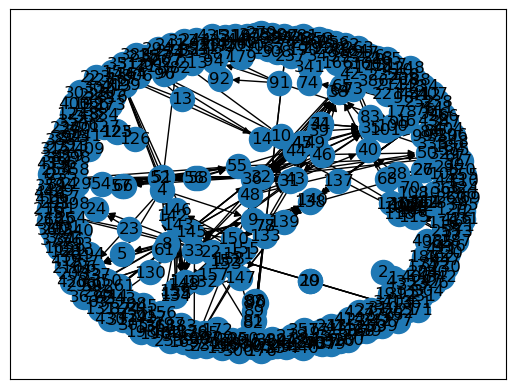

In [59]:
nx.draw_networkx(g1, with_labels=True)

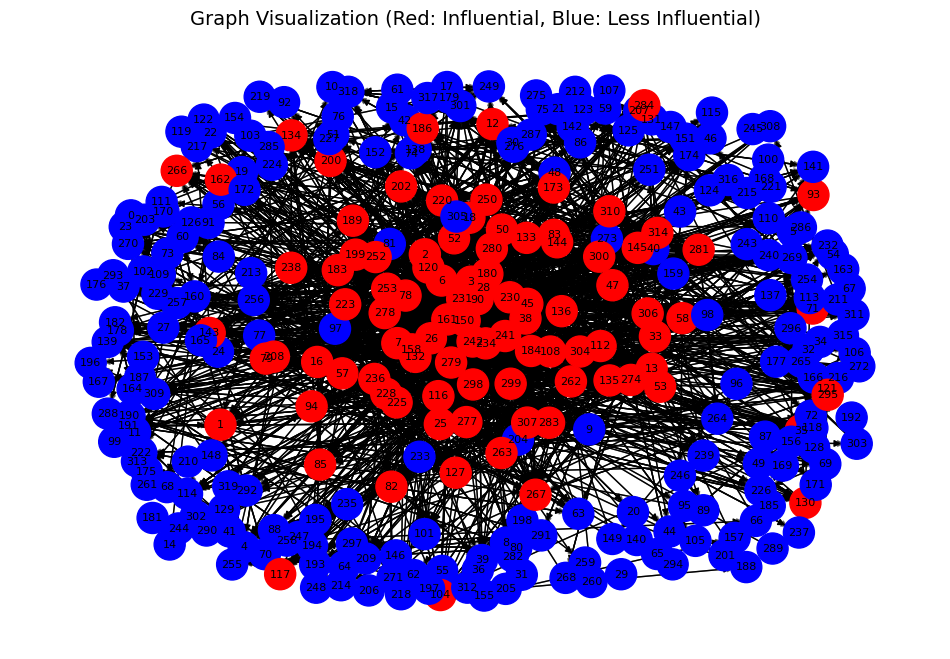

In [42]:

# Create a larger figure to give more space to the graph
fig, ax = plt.subplots(figsize=(12, 8))

# Position nodes using the spring layout with adjusted parameters for spacing
pos = nx.spring_layout(g1, k=0.5, iterations=20)

# Generate a color map for node labels
node_colors = ['red' if g1.nodes[node].get('label') == 1 else 'blue' for node in g1.nodes()]

# Draw the graph with the specified node colors and labels
nx.draw(g1, pos, ax=ax, node_color=node_colors, with_labels=True, node_size=500, font_size=8)

# Draw the edges more faintly if desired
nx.draw_networkx_edges(g1, pos, ax=ax, alpha=0.5)

# Set the title with a larger font size and remove the axis
ax.set_title('Graph Visualization (Red: Influential, Blue: Less Influential)', fontsize=14)
plt.axis('off')  # Hide the axes ticks and labels
plt.show()


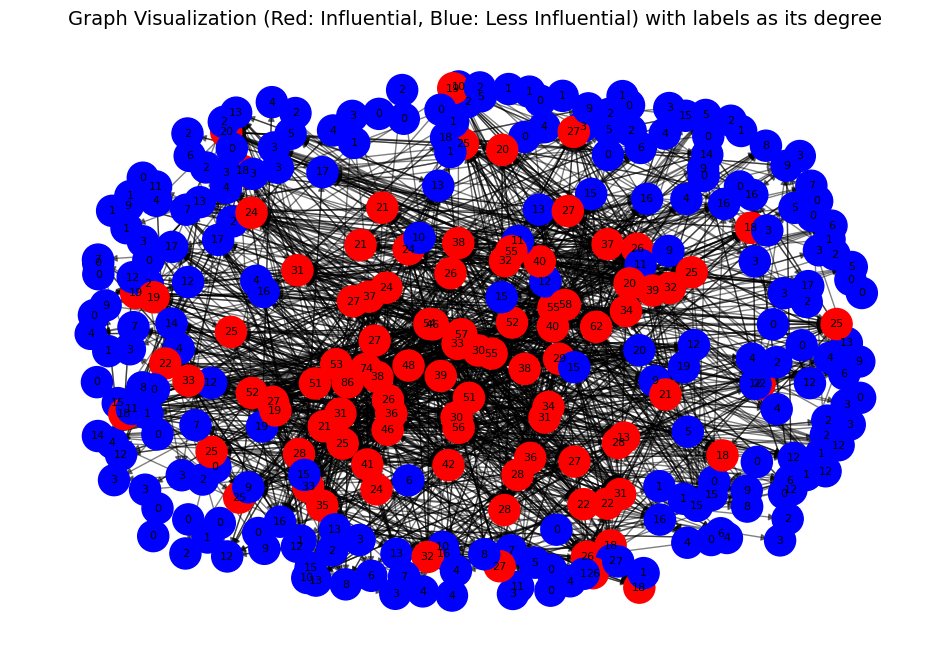

In [48]:

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate layout for visualization
pos = nx.spring_layout(g1, k=0.5, iterations=20)

# Generate a color map for node labels
node_colors = ['red' if g1.nodes[node].get('label') == 1 else 'blue' for node in g1.nodes()]

# Draw nodes with specified options
nx.draw_networkx_nodes(g1, pos, node_color=node_colors, node_size=500, ax=ax)

# Draw edges more faintly
nx.draw_networkx_edges(g1, pos, alpha=0.5, ax=ax)

# Prepare node labels with degree information
node_labels = {node: deg for node, deg in dict(g1.degree()).items()}
nx.draw_networkx_labels(g1, pos, labels=node_labels, font_size=8, ax=ax)

# Title and axis off
ax.set_title('Graph Visualization (Red: Influential, Blue: Less Influential) with labels as its degree', fontsize=14)
plt.axis('off')
plt.show()


In [46]:
import networkx as nx

# Check if the graph is strongly connected
if nx.is_strongly_connected(g1):
    print("The directed graph is strongly connected.")
else:
    print("The directed graph is not strongly connected.")

# Check if the graph is weakly connected
if nx.is_weakly_connected(g1):
    print("The directed graph is weakly connected.")
else:
    print("The directed graph is not weakly connected.")


The directed graph is not strongly connected.
The directed graph is not weakly connected.


In [47]:
# Find isolated nodes in the graph
isolated_nodes = [node for node in g1.nodes if g1.degree(node) == 0]

print("Isolated nodes found in the graph:")
print(len(isolated_nodes) )
   


Isolated nodes found in the graph:
39
